# **Project**
ANALYZING AND PREDICTING STOCK MARKET DURING RECESSION

In [1]:
# Install plotly
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Use market indexes 'NASDAQ' & 'S&P 500'
stock = ['^IXIC','^GSPC']
start = datetime.datetime(2007,1, 1)
end = datetime.datetime(2010,12,31)
stocks = yf.download(stock, start=start, end=end, interval= '1d')

[*********************100%***********************]  2 of 2 completed


In [4]:
# Display head
stocks.head()

Adj Close                     Close                      High  \
                  ^GSPC        ^IXIC        ^GSPC        ^IXIC        ^GSPC   
Date                                                                          
2007-01-03  1416.599976  2423.159912  1416.599976  2423.159912  1429.420044   
2007-01-04  1418.339966  2453.429932  1418.339966  2453.429932  1421.839966   
2007-01-05  1409.709961  2434.250000  1409.709961  2434.250000  1418.339966   
2007-01-08  1412.839966  2438.199951  1412.839966  2438.199951  1414.979980   
2007-01-09  1412.109985  2443.830078  1412.109985  2443.830078  1415.609985   

                                 Low                      Open               \
                  ^IXIC        ^GSPC        ^IXIC        ^GSPC        ^IXIC   
Date                                                                          
2007-01-03  2454.620117  1407.859985  2394.659912  1418.030029  2429.719971   
2007-01-04  2460.510010  1408.430054  2413.750000  1416.599976  2423.820068   
2007-01-05  2445.070068  1405.750000  2420.590088  1418.339966  2445.070068   
2007-01-08  2445.629883  1403.969971  2421.129883  1409.260010  2435.250000   
2007-01-09  2449.870117  1405.420044  2423.560059  1412.839966  2443.260010   

                Volume              
                 ^GSPC       ^IXIC  
Date                                
2007-01-03  3429160000  2435280000  
2007-01-04  3004460000  2104210000  
2007-01-05  2919400000  2060360000  
2007-01-08  2763340000  1905620000  
2007-01-09  3038380000  2144160000

In [5]:
# Segregate the data into NASDAQ & S&P500
nasdaq_stocks = stocks.loc[:, stocks.columns.get_level_values(1) == '^IXIC'].droplevel(1, axis=1)
sp_stocks = stocks.loc[:, stocks.columns.get_level_values(1) == '^GSPC'].droplevel(1, axis=1)

In [6]:
# Get 'Close' stocks
stock_close = stocks['Close']

In [7]:
# Display head
stock_close.head()

,^GSPC,^IXIC
Date,,
2007-01-03,1416.599976,2423.159912
2007-01-04,1418.339966,2453.429932
2007-01-05,1409.709961,2434.250000
2007-01-08,1412.839966,2438.199951
2007-01-09,1412.109985,2443.830078


In [8]:
# Display Statistics
stock_close.describe()

,^GSPC,^IXIC
count,1007.000000,1007.000000
mean,1195.993316,2233.027478
std,223.281334,358.426759
min,676.530029,1268.640015
25%,1049.334961,2092.879883
50%,1180.729980,2309.570068
75%,1406.759949,2495.715088
max,1565.150024,2859.120117


In [9]:
# Segregate NASDAQ & SP500
nasdaq = stock_close['^IXIC']
sp500 = stock_close['^GSPC']

In [10]:
# Use PLOTLY to plot the graph
# create the traces
trace1 = go.Scatter(x=nasdaq.index, y=nasdaq.values, name='NASDAQ')
trace2 = go.Scatter(x=sp500.index, y=sp500.values, name='S&P 500')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)

# set the plot title and axis names
fig.update_layout(title='Stocks', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()

Test for Stationarity 

In [11]:
#Test for Stationarity 
from statsmodels.tsa.stattools import adfuller

In [12]:
stat_test = adfuller(stock_close['^GSPC'])
print('The test statistics is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistics is -1.2735255443844073 and p-value is 0.6411957163406594


In [13]:
stat_test = adfuller(stock_close['^IXIC'])
print('The test statistics is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistics is -1.1868202827706262 and p-value is 0.6792394423676373


The p-value suggests that the time series is non-stationary as it is higher than 0.05.

In time series, it is common to have non-stationary data and taking difference is a way to make non-stationary data a stationary one. Taking first difference is nothing but taking difference of two successive values. 

In [14]:
#To remove stationarity we do something called seasonal first differencing
stock_close['^GSPC_first_difference'] = stock_close['^GSPC'] - stock_close['^GSPC'].shift(1)
stock_close['^IXIC_first_difference'] = stock_close['^IXIC'] - stock_close['^IXIC'].shift(1)

In [15]:
#then applying adfuller test after differencing to check if it is converted to stationarity
stat_test = adfuller(stock_close['^GSPC_first_difference'].dropna())
print('The test statistics is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistics is -19.28372505414035 and p-value is 0.0


In [16]:
stat_test = adfuller(stock_close['^IXIC_first_difference'].dropna())
print('The test statistics is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistics is -18.58690016379491 and p-value is 2.075289301693299e-30


From both the p-values, it suggests that it is less than 0.05. Hence Null hypothesis can be rejected and we have enough evidence that the data is stationary.

In [17]:
# Plot
# create the traces
trace1 = go.Scatter(x=stock_close['^GSPC_first_difference'].index, y=stock_close['^GSPC_first_difference'].values, name='S&P 500 Diff')
trace2 = go.Scatter(x=stock_close['^IXIC_first_difference'].index, y=stock_close['^IXIC_first_difference'].values, name='NASDAQ Diff')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)

# set the plot title and axis names
fig.update_layout(title='Differenced Stock Price', xaxis_title='Date')

# display the figure
fig.show()

In [18]:
# Import statsmodel
import statsmodels.api as sm

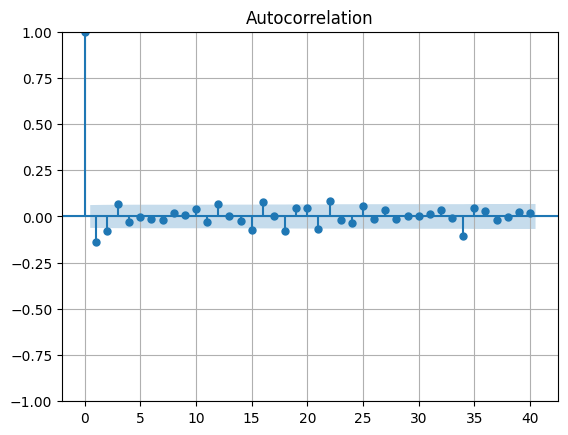

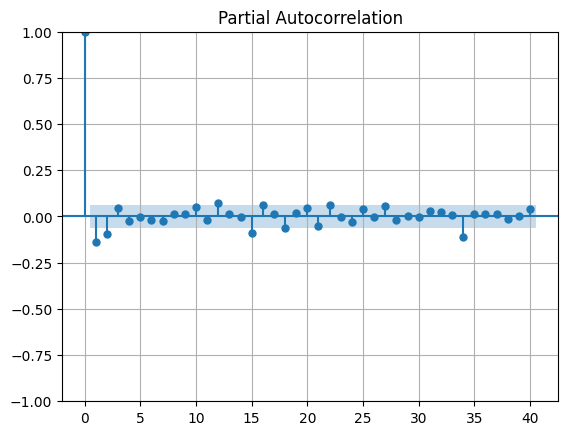

In [19]:
# For GSPC
sm.graphics.tsa.plot_acf(stock_close['^GSPC_first_difference'].iloc[2:], lags = 40);
plt.grid(True)
sm.graphics.tsa.plot_pacf(stock_close['^GSPC_first_difference'].iloc[2:], lags = 40);
plt.grid(True)

In PACF plot, the exponential plot shuts off suddenly at value=1 and the p value can be considered as 1.<br>
In ACF plot, the exponential plot shuts off suddenly at value=1 and q value can be considered as 1.

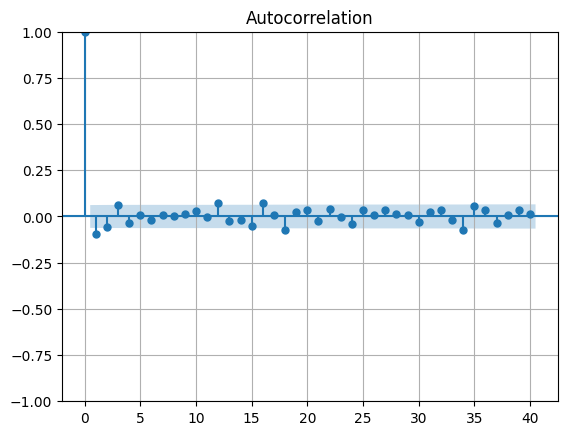

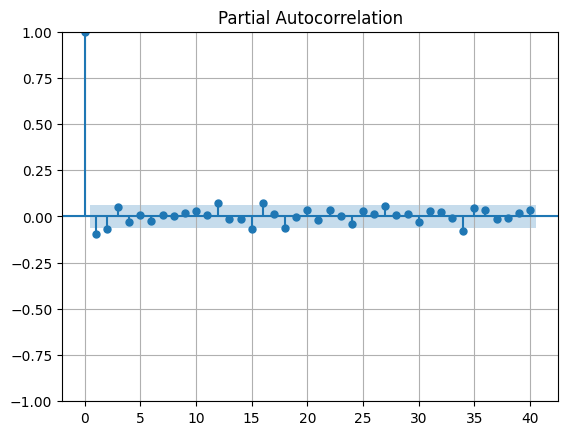

In [20]:
# For IXIC
sm.graphics.tsa.plot_acf(stock_close['^IXIC_first_difference'].iloc[2:], lags = 40);
plt.grid(True)
sm.graphics.tsa.plot_pacf(stock_close['^IXIC_first_difference'].iloc[2:], lags = 40);
plt.grid(True)

In PACF plot, the exponential plot shuts off suddenly at value=1 and the p value can be considered as 1.<br>
In ACF plot, the exponential plot shuts off suddenly at value=1 and q value can be considered as 1.

# **ARIMA**

In [21]:
# Import required ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [22]:
# Segregate the diff
nasdaq_diff = stock_close['^IXIC_first_difference']
gspc_diff = stock_close['^GSPC_first_difference']

In [23]:
# Split the stock into training & test sets
diff_train_len = int(stock_close.shape[0] * 0.8) 
diff_train = stock_close.iloc[:diff_train_len, :]
diff_test = stock_close.iloc[diff_train_len:, :]

In [24]:
# Start and end ponts of the dataset
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [25]:
# Train ARIMA model for 'NASDAQ'
nasdaq_ma_model = ARIMA(diff_train['^IXIC'], order =(1,2,1))
nasdaq_ma_result = nasdaq_ma_model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [26]:
# Predict from trained model
nasdaq_ma_pred = nasdaq_ma_result.predict(start, end)
nasdaq_ma_pred.index = diff_test['^IXIC'].index
# Forcast from trained model
nasdaq_forecast_index = pd.date_range(diff_test['^IXIC'].index[-1], periods=10)
nasdaq_ma_forecast = nasdaq_ma_result.forecast(steps=10)
nasdaq_ma_forecast.index = nasdaq_forecast_index

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [27]:
# Plot
# create the traces
trace1 = go.Scatter(x=diff_train['^IXIC'].index, y=diff_train['^IXIC'].values, name='Train')
trace2 = go.Scatter(x=diff_test['^IXIC'].index, y=diff_test['^IXIC'].values, name='Test')
trace3 = go.Scatter(x=nasdaq_ma_forecast.index, y=nasdaq_ma_forecast.values, name='Forecast')
trace4 = go.Scatter(x=nasdaq_ma_pred.index, y=nasdaq_ma_pred.values, name='Prediction')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# set the plot title and axis names
fig.update_layout(title='ARIMA (NASDAQ)', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()

In [28]:
# Import error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
# Calculate MeanAbsoluteError, MeanSquaredError, RootMeanSqaredError
mae_ma = mean_absolute_error(diff_test['^IXIC'], nasdaq_ma_pred)
mse_ma = mean_squared_error(diff_test['^IXIC'], nasdaq_ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test['^IXIC'], nasdaq_ma_pred))

In [30]:
ma_perf = {'mae_ma': mae_ma, 'mse_ma': mse_ma, 'rmse_ma': rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,194.420981,51483.594661,226.899966


In [31]:
# gspc

In [32]:
# Train ARIMA model for 'S&P 500'
sp_ma_model = ARIMA(diff_train['^GSPC'], order =(1,2,1))
sp_ma_result = sp_ma_model.fit()

# Forecast from trained model
sp_forecast_index = pd.date_range(diff_test['^GSPC'].index[-1], periods=10)
sp_ma_forecast = sp_ma_result.forecast(steps=10)
sp_ma_forecast.index = sp_forecast_index

# Predict from trained model
sp_ma_pred = sp_ma_result.predict(start, end)
sp_ma_pred.index = diff_test.index


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction re

In [33]:
# Plot
# create the traces
trace1 = go.Scatter(x=diff_train['^GSPC'].index, y=diff_train['^GSPC'].values, name='Train')
trace2 = go.Scatter(x=diff_test['^GSPC'].index, y=diff_test['^GSPC'].values, name='Test')
trace3 = go.Scatter(x=sp_ma_forecast.index, y=sp_ma_forecast.values, name='Forecast')
trace4 = go.Scatter(x=sp_ma_pred.index, y=sp_ma_pred.values, name='Prediction')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# set the plot title and axis names
fig.update_layout(title='ARIMA (S&P 500)', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
# Calculate MeanAbsoluteError, MeanSquaredError, RootMeanSqaredError
mae_ma = mean_absolute_error(diff_test['^GSPC'], sp_ma_pred)
mse_ma = mean_squared_error(diff_test['^GSPC'], sp_ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test['^GSPC'], sp_ma_pred))

In [36]:
ma_perf = {'mae_ma': mae_ma, 'mse_ma': mse_ma, 'rmse_ma': rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,61.00609,5477.437492,74.009712


# **SARIMAX**

In [37]:
# Import SARIMAX library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
# nasdaq_stocks.head()

In [39]:
X=nasdaq_stocks.drop('Close', axis=1)
y= nasdaq_stocks['Close']

In [40]:
# Split the stock into training & test sets
train_len = int(len(nasdaq_stocks) * 0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]


In [41]:
# Train SARIMAX model
sarimax = SARIMAX(y_train, exog=X_train, order=(1,2,1), seasonal_order=(0,1,1,12))
sarimax_result = sarimax.fit(disp=0)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [42]:
# Start & end points
start = len(X_train)
end = len(X_train) + len(X_test) - 1

In [43]:
# Predict based on trained model
sarimax_pred = sarimax_result.predict(start, end, exog=X_test)
sarimax_pred.index = X_test.index
# Forecast
sarimax_forecast = sarimax_result.forecast(steps=10, exog=X_test.iloc[-10:]) 
forecast_index = pd.date_range(y.index[-1], periods=10) 
sarimax_forecast.index = forecast_index

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [44]:
# Plot
# create the traces
trace1 = go.Scatter(x=y_train.index, y=y_train.values, name='Train')
trace2 = go.Scatter(x=y_test.index, y=y_test.values, name='Test')
trace3 = go.Scatter(x=sarimax_pred.index, y=sarimax_pred.values, name='Prediction')
trace4 = go.Scatter(x=sarimax_forecast.index, y=sarimax_forecast.values, name='Forecast')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# set the plot title and axis names
fig.update_layout(title='SARIMAX (NASDAQ)', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()

In [45]:
# Calculate errors
mae_sarimax = mean_absolute_error(y_test, sarimax_pred)
mse_sarimax = mean_squared_error(y_test, sarimax_pred)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, sarimax_pred))

In [46]:
sarimax_perf = {'mae_sarimax':mae_sarimax, 'mse_sarimax':mse_sarimax, 'rmse_sarimax':rmse_sarimax} 
sarimax_perf = pd.DataFrame([sarimax_perf])
sarimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,1.273419,1.849841,1.360088


In [47]:
# For S&P 500
X=sp_stocks.drop('Close', axis=1)
y= sp_stocks['Close']

# Split the stock into training & test sets
train_len = int(len(sp_stocks) * 0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

# Train model
sp_sarimax = SARIMAX(y_train, exog=X_train, order=(1,2,1), seasonal_order=(0,1,1,12))
sp_sarimax_result = sp_sarimax.fit(disp=0)

# Start and End points
start = len(X_train)
end = len(X_train) + len(X_test) - 1

# Predict
sp_sarimax_pred = sp_sarimax_result.predict(start, end, exog=X_test)
sp_sarimax_pred.index = X_test.index

# Forecast
sp_sarimax_forecast = sarimax_result.forecast(steps=10, exog=X_test.iloc[-10:]) 
sp_forecast_index = pd.date_range(y.index[-1], periods=10) 
sp_sarimax_forecast.index = sp_forecast_index

# Plot
# create the traces
trace1 = go.Scatter(x=y_train.index, y=y_train.values, name='Train')
trace2 = go.Scatter(x=y_test.index, y=y_test.values, name='Test')
trace3 = go.Scatter(x=sp_sarimax_pred.index, y=sp_sarimax_pred.values, name='Prediction')
trace4 = go.Scatter(x=sp_sarimax_forecast.index, y=sp_sarimax_forecast.values, name='Forecast')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# set the plot title and axis names
fig.update_layout(title='SARIMAX (S&P 500)', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `s

In [48]:
# Calculate errors
mae_sarimax = mean_absolute_error(y_test, sp_sarimax_pred)
mse_sarimax = mean_squared_error(y_test, sp_sarimax_pred)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, sp_sarimax_pred))

sarimax_perf = {'mae_sarimax':mae_sarimax, 'mse_sarimax':mse_sarimax, 'rmse_sarimax':rmse_sarimax} 
sarimax_perf = pd.DataFrame([sarimax_perf])
sarimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,7.055120e-08,7.217084e-15,8.495342e-08


## **2023 Analysis**

In [49]:
# Get market indexes
stock_ = ['^IXIC','^GSPC']
start_ = datetime.datetime(2007,1, 1)
end_ = datetime.datetime(2023,4,3)
stocks_ = yf.download(stock_, start=start_, end=end_, interval= '1d')

[*********************100%***********************]  2 of 2 completed


In [50]:
# Segeagate Stocks
nasdaq_stocks_ = stocks_.loc[:, stocks_.columns.get_level_values(1) == '^IXIC'].droplevel(1, axis=1)
sp_stocks_ = stocks_.loc[:, stocks_.columns.get_level_values(1) == '^GSPC'].droplevel(1, axis=1)


In [51]:
# Display dataframe
nasdaq_stocks_

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2007-01-03,2423.159912,2423.159912,2454.620117,2394.659912,2429.719971,2435280000
2007-01-04,2453.429932,2453.429932,2460.510010,2413.750000,2423.820068,2104210000
2007-01-05,2434.250000,2434.250000,2445.070068,2420.590088,2445.070068,2060360000
2007-01-08,2438.199951,2438.199951,2445.629883,2421.129883,2435.250000,1905620000
2007-01-09,2443.830078,2443.830078,2449.870117,2423.560059,2443.260010,2144160000
...,...,...,...,...,...,...
2023-03-27,11768.839844,11768.839844,11903.209961,11739.049805,11868.540039,4330320000
2023-03-28,11716.080078,11716.080078,11752.759766,11635.030273,11752.759766,4036910000
2023-03-29,11926.240234,11926.240234,11941.599609,11823.349609,11855.589844,4493540000


In [52]:
X=nasdaq_stocks_.drop('Close', axis=1)
y= nasdaq_stocks_['Close']

In [53]:
# Split the stock into training & test sets
train_len = int(len(nasdaq_stocks_) * 0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

In [54]:
# Train model
sarimax = SARIMAX(y_train, exog=X_train, order=(1,2,1), seasonal_order=(0,1,1,12))
sarimax_result = sarimax.fit(disp=0)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [56]:
start = len(X_train)
end = len(X_train) + len(X_test) - 1

In [57]:
# Predict
sarimax_pred = sarimax_result.predict(start, end, exog=X_test)
sarimax_pred.index = X_test.index

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [58]:
# Forecast
sarimax_forecast = sarimax_result.forecast(steps=10, exog=X_test.iloc[-10:]) 
forecast_index = pd.date_range(y.index[-1], periods=14) 
# sarimax_forecast.index = forecast_index

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [59]:
forecast_index

DatetimeIndex(['2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03',
               '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07',
               '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11',
               '2023-04-12', '2023-04-13'],
              dtype='datetime64[ns]', freq='D')

In [60]:
forecast_index_ = [i for i in forecast_index if i.day_of_week in [0,1,2,3,4]]
sarimax_forecast.index = forecast_index_

In [61]:
# Display forecast index
forecast_index_

[Timestamp('2023-03-31 00:00:00', freq='D'),
 Timestamp('2023-04-03 00:00:00', freq='D'),
 Timestamp('2023-04-04 00:00:00', freq='D'),
 Timestamp('2023-04-05 00:00:00', freq='D'),
 Timestamp('2023-04-06 00:00:00', freq='D'),
 Timestamp('2023-04-07 00:00:00', freq='D'),
 Timestamp('2023-04-10 00:00:00', freq='D'),
 Timestamp('2023-04-11 00:00:00', freq='D'),
 Timestamp('2023-04-12 00:00:00', freq='D'),
 Timestamp('2023-04-13 00:00:00', freq='D')]

In [62]:
# Plot
# create the traces
trace1 = go.Scatter(x=y_train.index, y=y_train.values, name='Train')
trace2 = go.Scatter(x=y_test.index, y=y_test.values, name='Test')
trace3 = go.Scatter(x=sarimax_pred.index, y=sarimax_pred.values, name='Prediction')
trace4 = go.Scatter(x=sarimax_forecast.index, y=sarimax_forecast.values, name='Forecast')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# set the plot title and axis names
fig.update_layout(title='SARIMAX (NASDAQ)', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()

In [63]:
# Calculate Errors
mae_sarimax = mean_absolute_error(y_test, sarimax_pred)
mse_sarimax = mean_squared_error(y_test, sarimax_pred)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, sarimax_pred))

sarimax_perf = {'mae_sarimax':mae_sarimax, 'mse_sarimax':mse_sarimax, 'rmse_sarimax':rmse_sarimax} 
sarimax_perf = pd.DataFrame([sarimax_perf])
sarimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,1.430873,2.081367,1.442694


In [64]:
# S&P 500
X= sp_stocks_.drop('Close', axis=1)
y= sp_stocks_['Close']

# Split the stock into training & test sets
train_len = int(len(sp_stocks_) * 0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

# Train the model
sp_sarimax_ = SARIMAX(y_train, exog=X_train, order=(1,2,1), seasonal_order=(0,1,1,12))
sp_sarimax_result_ = sp_sarimax_.fit(disp=0)


start = len(X_train)
end = len(X_train) + len(X_test) - 1

# Predict
sp_sarimax_pred_ = sp_sarimax_result_.predict(start, end, exog=X_test)
sp_sarimax_pred_.index = X_test.index

# Forecast
sp_sarimax_forecast_ = sarimax_result.forecast(steps=10, exog=X_test.iloc[-10:]) 
forecast_index = pd.date_range(y.index[-1], periods=14) 
forecast_index_ = [i for i in forecast_index if i.day_of_week in [0,1,2,3,4]]
sp_sarimax_forecast_.index = forecast_index_

# Plot
# create the traces
trace1 = go.Scatter(x=y_train.index, y=y_train.values, name='Train')
trace2 = go.Scatter(x=y_test.index, y=y_test.values, name='Test')
trace3 = go.Scatter(x=sp_sarimax_pred_.index, y=sp_sarimax_pred_.values, name='Prediction')
trace4 = go.Scatter(x=sp_sarimax_forecast_.index, y=sp_sarimax_forecast_.values, name='Forecast')

# create the figure and add the traces
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# set the plot title and axis names
fig.update_layout(title='SARIMAX (S&P 500)', xaxis_title='Date', yaxis_title='Price')

# display the figure
fig.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `s

In [65]:
# Calculate errors
mae_sarimax = mean_absolute_error(y_test, sp_sarimax_pred_)
mse_sarimax = mean_squared_error(y_test, sp_sarimax_pred_)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, sp_sarimax_pred_))

sarimax_perf = {'mae_sarimax':mae_sarimax, 'mse_sarimax':mse_sarimax, 'rmse_sarimax':rmse_sarimax} 
sarimax_perf = pd.DataFrame([sarimax_perf])
sarimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,0.494702,0.248769,0.498768


For 2023 Analysis, we have considered data from 01/01/2007 to 04/2/2023


*   Model performed better for huge data
    *   Both 'Test' and 'Prediction' almost overlapped
*   The error is minimal for SARIMAX, thus better than ARIMA
*   The forecast shows that there is an increasing trend from Apr 10, 2023
      *   NASDAQ - 11.6K to 12.2K
      *   S&P 500 - 3951 to 4109
*   We can observe dip in forecast on Apr 4,2023 & slight dip Apr 10, 2023








Reference:

*   DATA 690 Special Topics in Data Science (Lecture Notes)



